In [25]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D   #3d plotting
import matplotlib.pyplot as plt


In [366]:
X=[]
Y=[]

for line in open('data_2d.csv'):
    
    x1,x2,y=line.split(',')
    
    X.append([float(x1),float(x2),1])
    Y.append(float(y))

X=np.array(X)  
Y=np.array(Y)


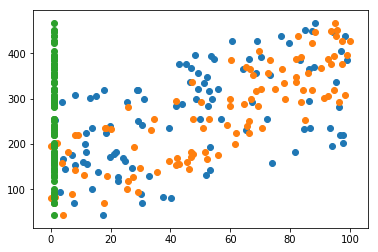

In [367]:
plt.scatter(X[:,0],Y)
plt.scatter(X[:,1],Y)
plt.scatter(X[:,2],Y)

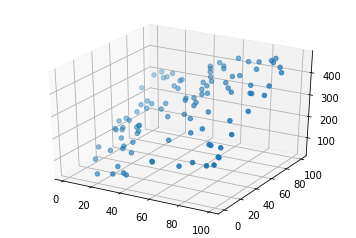

In [368]:
#or

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

In [369]:
#(XT.X)w=XT.Y  
w=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))

In [370]:
w

array([2.01666793, 2.96985048, 1.46191241])

In [372]:
y_new=np.dot(X,(w.T))
y_inv_res=y_new

In [330]:
np.shape(y_new)

(100,)

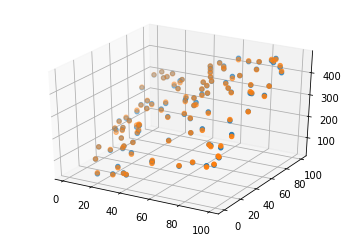

In [373]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
ax.scatter(X[:,0],X[:,1],y_new)

In [374]:
R_squared=1-(((Y-y_new).dot(Y-y_new))/((Y-Y.mean()).dot(Y-Y.mean())))

In [375]:
R_squared

0.9980040612475777

In [376]:
np.shape(X)[1]

3

In [377]:
#sigma * np.random.randn(...) + mu   For random samples from N(\mu, \sigma^2), use: 1/D variance
dim=np.shape(X)[1]
sigma_=np.sqrt(1/dim)
w_alpha=sigma_*(np.random.rand(dim))+0.0
#sigma_

In [378]:
w_alpha

array([0.2921322 , 0.07465795, 0.4142773 ])

In [337]:
X

array([[17.93020121, 94.52059195,  1.        ],
       [97.14469719, 69.59328198,  1.        ],
       [81.77590078,  5.7376481 ,  1.        ],
       [55.85434242, 70.32590168,  1.        ],
       [49.36654999, 75.11404016,  1.        ],
       [ 3.19270247, 29.25629886,  1.        ],
       [49.20078406, 86.14443851,  1.        ],
       [21.8828039 , 46.8415052 ,  1.        ],
       [79.50986272, 87.39735554,  1.        ],
       [88.1538875 , 65.20564193,  1.        ],
       [60.74385434, 99.9576339 ,  1.        ],
       [67.41558195, 50.36830961,  1.        ],
       [48.31811577, 99.12895314,  1.        ],
       [28.82997197, 87.18494885,  1.        ],
       [43.85374266, 64.47363908,  1.        ],
       [25.31369409, 83.54529426,  1.        ],
       [10.80772667, 45.69556859,  1.        ],
       [98.36574588, 82.69739353,  1.        ],
       [29.14690997, 66.36510676,  1.        ],
       [65.1003019 , 33.3538835 ,  1.        ],
       [24.64411349, 39.54005274,  1.   

In [379]:
dim=np.shape(X)[0]
dim

100

In [380]:
dim=np.shape(X)[0]
X_norm=np.zeros((dim,np.shape(X)[1]))
Y_norm=np.zeros((np.shape(X)[0]))
np.max(Y)

466.265805791

In [381]:
for i in range(0,np.shape(X)[1]-1):
    #print(np.mean(X[:,i]),np.max(X[:,i]),np.min(X[:,i]))
    X_norm[:,i]=(X[:,i]-np.mean(X[:,i]))/(np.max(X[:,i])-np.min(X[:,i]))
    #X_norm[:,i]=X[:,i]
X_norm[:,np.shape(X)[1]-1]=1.0    

for i in range(0,np.shape(X)[0]-1):
    
    #Y_norm[i]=(Y[i]-np.mean(Y))/(np.max(Y)-np.min(Y))
    Y_norm[i]=Y[i]                   #by normalizing X alone can converge, without X normalizing does not converge

In [382]:
Y_norm=np.array(Y_norm)
X_norm=np.array(X_norm)
X_norm

array([[-0.30781614,  0.38314541,  1.        ],
       [ 0.50367983,  0.13344718,  1.        ],
       [ 0.34623748, -0.50619819,  1.        ],
       [ 0.08068962,  0.14078587,  1.        ],
       [ 0.01422682,  0.18874892,  1.        ],
       [-0.45879129, -0.27061058,  1.        ],
       [ 0.01252866,  0.29924102,  1.        ],
       [-0.26732454, -0.09445861,  1.        ],
       [ 0.32302354,  0.31179156,  1.        ],
       [ 0.4115754 ,  0.08949595,  1.        ],
       [ 0.13077918,  0.43760856,  1.        ],
       [ 0.19912627, -0.05913042,  1.        ],
       [ 0.00348636,  0.42930762,  1.        ],
       [-0.19615577,  0.30966387,  1.        ],
       [-0.04224796,  0.08216344,  1.        ],
       [-0.23217752,  0.27320525,  1.        ],
       [-0.3807808 , -0.10593752,  1.        ],
       [ 0.51618861,  0.26471178,  1.        ],
       [-0.19290896,  0.10111037,  1.        ],
       [ 0.17540788, -0.22956485,  1.        ],
       [-0.2390369 , -0.16759766,  1.   

In [383]:
w_alpha=sigma_*(np.random.rand(3))+0.0
print(w_alpha)

[0.30269928 0.16203658 0.29377317]


In [387]:
alpha_=0.001      #[[0.001,0.001,0.001]]
#alpha_=[0.2,0.1,0.01]   #did not make a differnece at high iterations, get to coss=0.0006720300664445527
costs=[]
itr=[]
dim=np.shape(X)[1]
sigma_=np.sqrt(1/dim)
w_alpha=sigma_*(np.random.rand(3))+0.0
#print('0 iterate')
#print(w_alpha)
#print('iterate')
#print(X_norm)
for i in range(10000):
    
    y_new=X_norm.dot(w_alpha)
    delta=(y_new-Y_norm)
    w_alpha=w_alpha-alpha_*(X_norm.T.dot(delta))
    mse=(delta.dot(delta))/np.shape(X)[0]
    costs.append(mse)
    itr.append(i)
    #print(w_alpha)

y_gradient=y_new
#print(np.shape(w_alpha))
#print(np.shape(X_norm.T))
#print(np.shape(X_norm))
#print(np.shape(y_new))
#print(delta)
#costs[999]

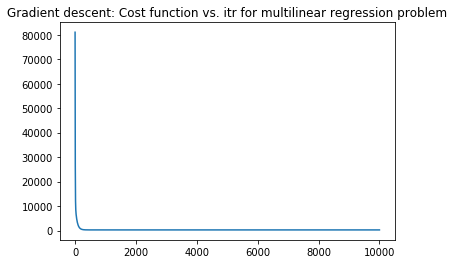

In [388]:
0.000672030933712375
0.0036045686125814012
#0.0006720300664445527 10K  0.001
#costs[999]
fig=plt.figure()
plt.plot(itr,costs)
plt.title('Gradient descent: Cost function vs. itr for multilinear regression problem')
plt.show()

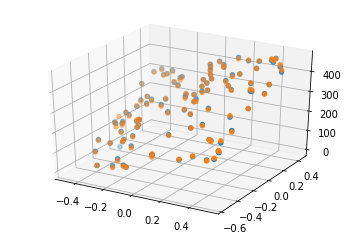

In [389]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_norm[:,0],X_norm[:,1],Y_norm)
ax.scatter(X_norm[:,0],X_norm[:,1],y_new)

In [390]:
R_squared=1-(((Y_norm-y_new).dot(Y_norm-y_new))/((Y_norm-Y_norm.mean()).dot(Y_norm-Y_norm.mean())))

In [391]:
R_squared    #Rsq lowered than direct method

0.9758291454307354

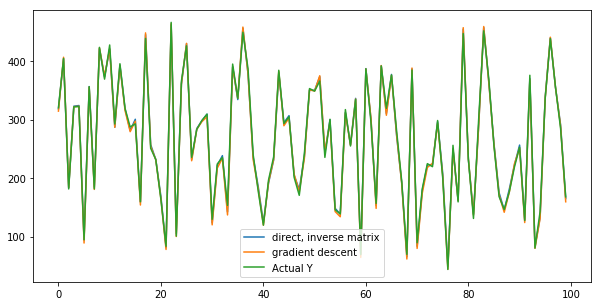

In [409]:
fig=plt.figure(figsize=(10,5))
plt.plot(y_inv_res,label='direct, inverse matrix')
plt.plot(y_gradient,label='gradient descent')
plt.plot(Y,label='Actual Y')
plt.legend()

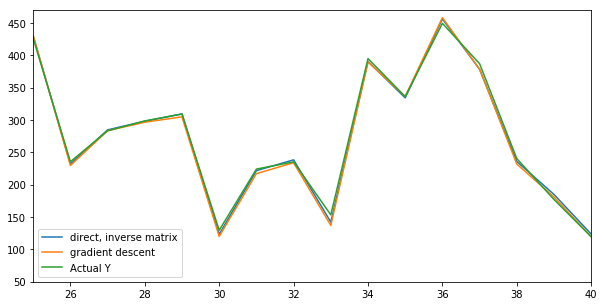

In [423]:
fig=plt.figure(figsize=(10,5))
plt.plot(y_inv_res,label='direct, inverse matrix')
plt.plot(y_gradient,label='gradient descent')
plt.plot(Y,label='Actual Y')
plt.xlim(25,40)
plt.ylim(50,470)
plt.legend()